In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import platform
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
from matplotlib import rcParams
import csv
import matplotlib.ticker as ticker
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
# -------------------- 1. 기본 설정 --------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지


total22_df = pd.read_csv("전연령22_utf8.csv", low_memory=False)
senior22_df = pd.read_csv("노인승하차22_utf8.csv", low_memory=False)
total24_df = pd.read_csv("전연령24_utf8.csv", low_memory=False)
senior24_df = pd.read_csv("노인승하차24_utf8.csv", low_memory=False)
total23_df = pd.read_csv("전연령23_utf8.csv", low_memory=False)
senior23_df = pd.read_csv("노인승하차23_utf8.csv", low_memory=False)
#senior_care_df = pd.read_csv("senior_care_utf8.csv", low_memory=False) # 파일이 사라짐
sme_df = pd.read_csv("sme.csv", low_memory=False)
park_df = pd.read_csv("TB_PTP_PRK_M.csv", low_memory=False)
safety_df = pd.read_csv("안전사고_utf.csv", low_memory=False)
elderly_2020_2022 = pd.read_csv(
    "elderly2020_2022.csv",
    low_memory=False,
    quoting=csv.QUOTE_NONE,
    encoding="utf-8",
    on_bad_lines='skip'  # 문제 있는 라인은 건너뜀
)
elderly_2023_2025 = pd.read_csv(
    "elderly2023_2025.csv",
    low_memory=False,
    quoting=csv.QUOTE_NONE,
    encoding="utf-8",
    on_bad_lines='skip'
)
weather_raw = pd.read_csv("weath20_25_utf8.csv", encoding='utf-8')
rain_raw = pd.read_csv("rain20_25_utf8.csv", encoding='utf-8') # 강수량 파일명 확인 필요

import io
rain_csv_data = """년월,지점,강수량(mm)
2020-01,108,60.5
2020-02,108,53.1
2020-03,108,16.3
2020-04,108,16.9
2020-05,108,112.4
2020-06,108,139.6
2020-07,108,270.4
2020-08,108,675.7
2020-09,108,181.5
2020-10,108,0
2020-11,108,120.1
2020-12,108,4.6
2021-01,108,18.9
2021-02,108,7.1
2021-03,108,110.9
2021-04,108,124.1
2021-05,108,183.1
2021-06,108,104.6
2021-07,108,168.3
2021-08,108,211.2
2021-09,108,131
2021-10,108,57
2021-11,108,62.4
2021-12,108,7.9
2022-01,108,5.5
2022-02,108,4.7
2022-03,108,102.6
2022-04,108,20.4
2022-05,108,7.5
2022-06,108,393.8
2022-07,108,252.3
2022-08,108,564.8
2022-09,108,201.5
2022-10,108,124.1
2022-11,108,84.5
2022-12,108,13.6
2023-01,108,47.9
2023-02,108,1
2023-03,108,10.5
2023-04,108,96.9
2023-05,108,155.6
2023-06,108,195.6
2023-07,108,459.9
2023-08,108,298.1
2023-09,108,134.5
2023-10,108,31
2023-11,108,81.9
2023-12,108,85.9
2024-01,108,18.9
2024-02,108,74.7
2024-03,108,29.9
2024-04,108,33.2
2024-05,108,125.1
2024-06,108,115.9
2024-07,108,557.3
2024-08,108,72.8
2024-09,108,143.9
2024-10,108,74
2024-11,108,60
2024-12,108,5.7
2025-01,108,19.5
2025-02,108,5.2
2025-03,108,38.2
2025-04,108,94.6
2025-05,108,123.6
2025-06,108,98.1
2025-07,108,293.9
2025-08,108,290.3
2025-09,108,370.7
2025-10,108,186.3
2025-11,108,2.9"""

# 2. 기온 데이터 (Temp)
weather_csv_data = """년월,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
2020-01,108,1.6,-1.7,5.9
2020-02,108,2.5,-1.3,7.2
2020-03,108,7.7,2.6,13.3
2020-04,108,11.1,6.3,16.6
2020-05,108,18,13.7,23.3
2020-06,108,23.9,19.9,29
2020-07,108,24.1,21.1,28
2020-08,108,26.5,24.4,29.3
2020-09,108,21.4,18,25.6
2020-10,108,14.3,9.6,19.5
2020-11,108,8,4,12.6
2020-12,108,-0.3,-4.2,3.9
2021-01,108,-2.4,-6.8,2.2
2021-02,108,2.7,-2.2,7.9
2021-03,108,9,4.3,14.8
2021-04,108,14.2,9.5,19.5
2021-05,108,17.1,12.8,21.9
2021-06,108,22.8,18.9,27.6
2021-07,108,28.1,24.6,32.2
2021-08,108,25.9,22.8,29.7
2021-09,108,22.6,18.8,26.9
2021-10,108,15.6,11.6,20.5
2021-11,108,8.2,4,13.1
2021-12,108,0.6,-3.5,5.1
2022-01,108,-2.2,-6.2,2.6
2022-02,108,-1.1,-5.3,3.8
2022-03,108,7.7,3.2,12.7
2022-04,108,14.8,10,20.6
2022-05,108,19.1,13.9,25
2022-06,108,23.3,19.8,27.5
2022-07,108,27.3,24.2,31
2022-08,108,25.7,23.1,28.9
2022-09,108,22.4,18.2,27.2
2022-10,108,14.6,10.3,19.7
2022-11,108,10,5.6,15.4
2022-12,108,-2.8,-6.6,1.7
2023-01,108,-1.5,-5.7,3.2
2023-02,108,2.3,-1.9,7.3
2023-03,108,9.8,4.2,16.2
2023-04,108,13.8,8.8,19
2023-05,108,19.5,14.6,25
2023-06,108,23.4,19.7,27.9
2023-07,108,26.7,23.9,30.2
2023-08,108,27.2,24.3,30.8
2023-09,108,23.7,20.2,27.6
2023-10,108,15.8,11.5,21
2023-11,108,6.8,2.9,11.5
2023-12,108,1.1,-2.5,5.2
2024-01,108,-0.5,-3.9,3.6
2024-02,108,3.8,0.2,8.2
2024-03,108,7,2.4,12
2024-04,108,16.3,11.5,22.4
2024-05,108,18.5,13.8,23.7
2024-06,108,24.6,19.9,30.1
2024-07,108,26.6,24.1,29.6
2024-08,108,29.3,26.3,33.3
2024-09,108,25.5,22,29.8
2024-10,108,16.7,12.7,21.4
2024-11,108,9.7,5.5,14.9
2024-12,108,0.8,-2.9,5.3
2025-01,108,-0.4,-4.1,3.9
2025-02,108,-1.2,-5.3,3.9
2025-03,108,8,3.3,13.6
2025-04,108,13.4,8.2,19
2025-05,108,17.8,13.3,22.7
2025-06,108,24,20,28.5
2025-07,108,28.8,25.7,32.6
2025-08,108,28.2,25.3,31.9
2025-09,108,23.5,20.3,27.4
2025-10,108,16.5,13.1,20.4
2025-11,108,,"""
# 역별 승하차인원           => total22_df, total24_df
# 65세 노인 승하차인원      => senior22_df, senior24_df
# 노인요양시설(요양원)      => senior_care_df
# 종사자, 사업체 수         => sme_df
# 안전사고                  => safety_df

# ------------------
# 확인용
# print(total22_df.head())
# print(total22_df.columns)
# print(senior22_df.head())
# print(senior22_df.columns)
# print(safety_df.head())
# print(senior_care_df.head())
# print(senior_care_df.columns)
# print(sme_df.head())
# print(sme_df.columns)
# print(park_df.head())
# ------------------

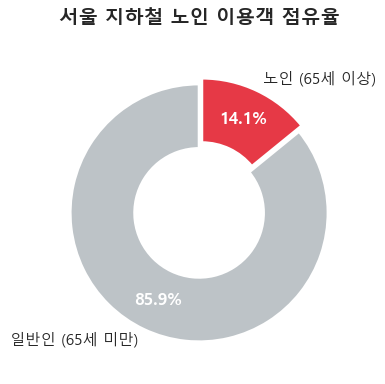

In [39]:


# 윈도우 사용자는 'Malgun Gothic', 맥 사용자는 'AppleGothic' 설정
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

# Seaborn 스타일 적용 (깔끔한 흰색 배경)
sns.set_theme(style="white", font='Malgun Gothic')

# ---------------------------------------------------------
# [1] 데이터 준비 (이전 단계에서 계산된 값 사용)
# ---------------------------------------------------------
# ※ 이전 코드에서 grand_total_general, grand_total_senior 값이 계산되어 있어야 합니다.
# 테스트를 위해 임의의 값을 넣습니다. (실제 사용 시엔 주석 처리하고 계산된 변수 사용)
# grand_total_general = 8500000000 # 예시 값
# grand_total_senior = 1500000000  # 예시 값

# 시각화용 데이터 정의
labels = ['일반인 (65세 미만)', '노인 (65세 이상)']
sizes = [grand_total_general, grand_total_senior]
colors = ['#BDC3C7', '#E63946'] # 회색 vs 세련된 빨강
explode = (0, 0.05)  # 노인 부분만 살짝 떼어내기 강조

# ---------------------------------------------------------
# [2] 시각화: PPT 맞춤형 도넛 차트 그리기
# ---------------------------------------------------------
# ★ 핵심: PPT 슬라이드 반쪽 크기에 딱 맞는 사이즈 지정 (인치 단위)
# (보통 PPT 슬라이드가 13.3 x 7.5 인치 정도 됩니다. 6x4면 반쪽에 넣기 좋습니다.)
fig, ax = plt.subplots(figsize=(6, 4)) 

# 파이 차트 그리기
wedges, texts, autotexts = ax.pie(
    sizes, 
    explode=explode, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%', # 퍼센트 표시 형식 (소수점 1자리)
    startangle=90,     # 시작 각도 조절
    pctdistance=0.75,  # 퍼센트 글씨 위치 (중심에서 얼마나 먼지)
    textprops={'fontsize': 11}, # 라벨 글자 크기 조절
    wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2} # 도넛 두께 및 테두리 설정
)

# 퍼센트 글씨 스타일 꾸미기
for autotext in autotexts:
    autotext.set_color('white') # 글씨색 흰색
    autotext.set_weight('bold') # 굵게
    autotext.set_fontsize(12)   # 크기 키우기

# 제목 추가 (PPT에 어울리는 깔끔한 폰트)
plt.title('서울 지하철 노인 이용객 점유율', fontsize=14, fontweight='bold', pad=20)

# ★ 핵심: 불필요한 여백 제거 (타이트하게 조이기)
plt.tight_layout()

# ---------------------------------------------------------
# [3] 고화질 이미지로 저장 (PPT 삽입용)
# ---------------------------------------------------------
# dpi=300으로 설정하면 인쇄해도 될 정도로 선명하게 저장됩니다.
plt.savefig('ppt_senior_ratio_chart.png', dpi=300, bbox_inches='tight')

plt.show()

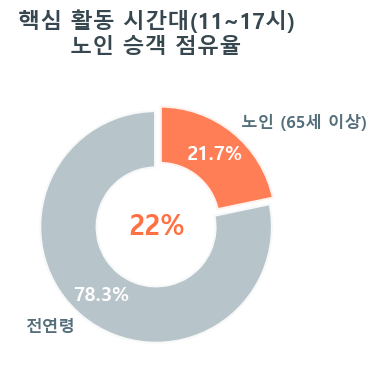

In [12]:

# ---------------------------------------------------------
# [0] 기본 설정
# ---------------------------------------------------------
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)
# 배경을 투명하게 하거나 깔끔한 흰색으로 설정
sns.set_theme(style="white", font='Malgun Gothic')

# ---------------------------------------------------------
# [1] 데이터 준비 (계산된 값 사용 가정)
# ---------------------------------------------------------
# (이전 단계에서 계산된 core_senior, core_general 변수 사용)
# 테스트용 임시 값 (실제 코드 실행 시엔 주석 처리하세요)
# core_senior = 350
# core_general = 650

# 비율 계산
core_total = core_senior + core_general
sizes = [core_general, core_senior]
labels = ['전연령', '노인 (65세 이상)']

# ---------------------------------------------------------
# [2] 디자인 설정 (핵심!)
# ---------------------------------------------------------
# ★ 색상 팔레트 수정 (눈이 편하고 세련된 조합)
# 일반인: 차분한 쿨 그레이 / 노인: 부드러운 코랄 레드
colors = ['#B0BEC5', '#FF7043'] 

# 강조 효과 (노인 파트만 살짝 떼어내기)
explode = (0, 0.05) 

# ---------------------------------------------------------
# [3] 시각화 생성
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 4)) 

wedges, texts, autotexts = ax.pie(
    sizes, 
    explode=explode, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%', 
    startangle=90, 
    pctdistance=0.75, # 퍼센트 글씨 위치
    textprops={'fontsize': 12, 'color': '#546E7A', 'weight': 'bold'}, # 라벨(일반인, 노인) 글씨 색상
    
    # ★ [투명도 및 테두리 설정] 여기가 포인트!
    wedgeprops={
        'width': 0.5,          # 도넛 두께
        'edgecolor': 'white',  # 테두리를 흰색으로
        'linewidth': 3,        # 테두리를 굵게 주어 깔끔하게 분리
        'alpha': 0.9           # 투명도 90% (은은하게 비치는 느낌)
    }
)

# ---------------------------------------------------------
# [4] 디테일 꾸미기
# ---------------------------------------------------------
# 퍼센트 숫자 글씨 꾸미기
for autotext in autotexts:
    autotext.set_color('white') # 내부는 흰색 글씨
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# 제목 설정
plt.title(f'핵심 활동 시간대(11~17시)\n노인 승객 점유율', 
          fontsize=16, fontweight='bold', color='#37474F', pad=20)

# 중앙에 텍스트 추가 (도넛 차트의 빈 공간 활용)
# "35% 집중" 같은 핵심 키워드를 넣으면 좋습니다.
senior_pct = (core_senior / core_total) * 100
ax.text(0, 0, f'{senior_pct:.0f}%', ha='center', va='center', fontsize=20, fontweight='bold', color='#FF7043')

plt.tight_layout()

# 배경 투명하게 저장 (PPT 배경색에 자연스럽게 녹아듦)
plt.savefig('ppt_core_time_ratio_pretty.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [42]:

# ----------------------------------------------------------
# [1] 데이터 전처리 (기존 로직 유지)
# ----------------------------------------------------------
# (senior24_df, total24_df가 로드되어 있다고 가정)

time_cols = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

def get_time_percentage(df, label):
    temp = df.copy()
    if '승하차구분' in temp.columns:
        temp = temp[temp['승하차구분'] == '하차']
    
    for col in time_cols:
        if col in temp.columns:
            temp[col] = pd.to_numeric(temp[col], errors='coerce').fillna(0)
            
    sums = temp[time_cols].sum()
    total_sum = sums.sum()
    
    if total_sum == 0: return sums
    
    ratio = (sums / total_sum) * 100
    return ratio

# 데이터 계산
senior_ratio = get_time_percentage(senior24_df, "노인")
total_ratio = get_time_percentage(total24_df, "전연령") 

# =========================================================
# [2] 시각화 (폰트 및 디자인 대폭 강화)
# =========================================================
fig = go.Figure()

# [Line 1] 전연령 (회색 점선)
fig.add_trace(go.Scatter(
    x=total_ratio.index,
    y=total_ratio.values,
    mode='lines',
    name='전연령 (평균)',
    # [수정] 선 굵기 확대 (PPT용)
    line=dict(color='#B0BEC5', width=5, dash='dot'), 
    hovertemplate='%{x}<br>전연령 비중: %{y:.1f}%'
))

# [Line 2] 노인 (붉은 실선 - 주인공)
fig.add_trace(go.Scatter(
    x=senior_ratio.index,
    y=senior_ratio.values,
    mode='lines+markers',
    name='노인 (65세 이상)',
    # [수정] 선 굵기 및 점 크기 확대
    line=dict(color='#E63946', width=6), 
    marker=dict(size=12, color='#1D3557', line=dict(width=3, color='white')),
    hovertemplate='%{x}<br>노인 비중: %{y:.1f}%'
))

# ★★★ [핵심 수정] 피크 타임 주석 (아주 크게 강조) ★★★
peak_time = senior_ratio.idxmax()
peak_val = senior_ratio.max()

fig.add_annotation(
    x=peak_time, y=peak_val,
    text=f"<b>노인 활동 피크<br>{peak_val:.1f}%</b>", # 줄바꿈 적용
    showarrow=True, arrowhead=2, arrowwidth=3, # 화살표 굵게
    ax=0, ay=-60, # 위로 더 띄움
    # [폰트 확대] 크기 20, 굵은 폰트
    font=dict(color='#E63946', size=20, family="Arial Black"),
    bgcolor="white", 
    bordercolor="#E63946", 
    borderwidth=3, # 테두리 굵게
    opacity=0.9
)

# 레이아웃 설정 (전체 폰트 확대)
fig.update_layout(
    title=dict(
        text="<b>시간대별 지하철 이용 집중도 비교 (비율 %)</b>",
        x=0.5, y=0.92,
        font=dict(size=28, family="Malgun Gothic", color='#333') # 제목 28pt
    ),
    xaxis=dict(
        title="시간대",
        title_font=dict(size=20, weight='bold'), # 축 제목 20pt
        tickangle=-45,
        tickfont=dict(size=16, weight='bold'),   # 눈금 16pt
        gridcolor='#eee'
    ),
    yaxis=dict(
        title="하루 이용량 중 비중 (%)",
        title_font=dict(size=20, weight='bold'),
        tickfont=dict(size=16),
        gridcolor='#eee',
        ticksuffix="%" 
    ),
    legend=dict(
        x=0.75, y=0.98, 
        bgcolor='rgba(255,255,255,0.9)',
        bordercolor='#ddd',
        borderwidth=1,
        font=dict(size=18) # 범례 폰트 18pt
    ),
    template="plotly_white",
    hovermode="x unified",
    margin=dict(t=100, b=100, l=80, r=50), # 여백 충분히 확보
    height=600 # 그래프 높이 확보
)

fig.show()

C:\Users\dbsdm\AppData\Local\Temp\ipykernel_2544\59093313.py:85: UserWarning:

FixedFormatter should only be used together with FixedLocator



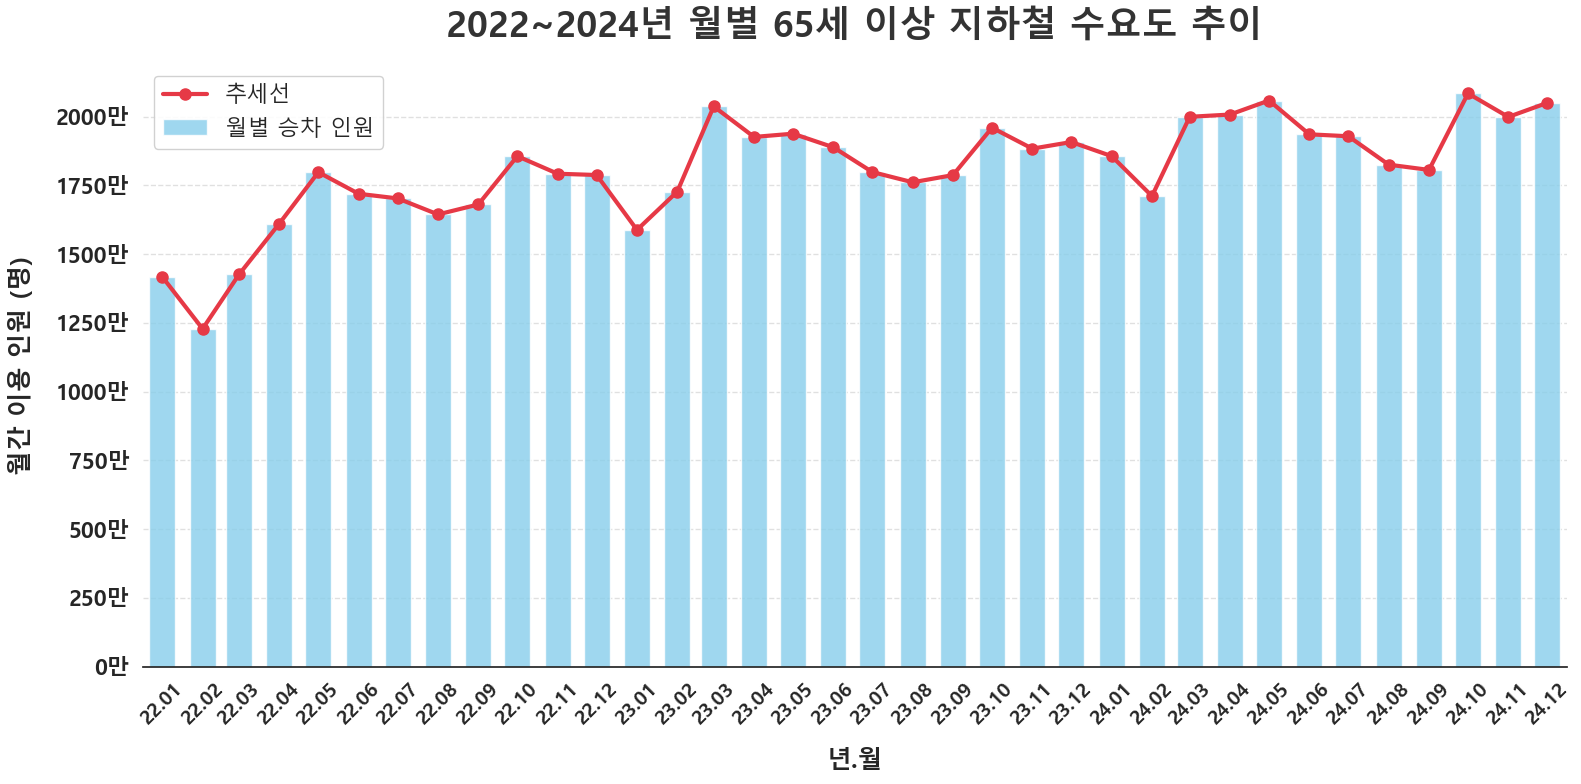

In [41]:

import matplotlib.dates as mdates


# ----------------------------------------------------------
# [0] 스타일 및 폰트 설정
# ----------------------------------------------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
sns.set_theme(style="white", font='Malgun Gothic')

# ----------------------------------------------------------
# [1] 데이터 연산 (기존 로직 유지)
# ----------------------------------------------------------
def process_monthly_demand(df_list):
    monthly_results = []
    
    # 시간대 컬럼 리스트 자동 추출
    time_cols = [c for c in df_list[0].columns if '시간대' in c]

    for df in df_list:
        temp_df = df.copy()
        
        # 승차만 필터링
        if '승하차구분' in temp_df.columns:
            temp_df = temp_df[temp_df['승하차구분'] == '승차']
            
        # 숫자 변환
        for col in time_cols:
            temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce').fillna(0)
            
        temp_df['일일총승객수'] = temp_df[time_cols].sum(axis=1)
        temp_df['수송일자'] = pd.to_datetime(temp_df['수송일자'])
        
        # 2022년 1월 1일 이후 데이터만 남김 (이전 데이터 제거)
        temp_df = temp_df[temp_df['수송일자'] >= '2022-01-01']

        df_month = temp_df.groupby(temp_df['수송일자'].dt.to_period('M'))['일일총승객수'].sum()
        monthly_results.append(df_month)
    
    total_series = pd.concat(monthly_results).sort_index()
    total_series.index = total_series.index.to_timestamp()
    
    return total_series

# 데이터 처리
dfs = [senior22_df, senior23_df, senior24_df]
all_month_data = process_monthly_demand(dfs)

# ----------------------------------------------------------
# [2] 시각화 (X축 범위 완벽 통제)
# ----------------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 8))

# 1. 막대 그래프
ax.bar(all_month_data.index, all_month_data.values, 
       width=20, 
       color='#87CEEB', 
       label='월별 승차 인원',
       alpha=0.8, zorder=2)

# 2. 추세선
ax.plot(all_month_data.index, all_month_data.values, 
        color='#E63946', linewidth=3, 
        marker='o', markersize=8, 
        label='추세선', zorder=3)

# 3. ★ 핵심 수정: X축 범위 강제 고정 (Trim) ★
# 데이터의 첫 날짜와 마지막 날짜를 구해서 딱 거기까지만 보여줌
# (좌우로 15일 정도만 여유를 둬서 막대가 짤리지 않게 함)
min_date = all_month_data.index.min()
max_date = all_month_data.index.max()
ax.set_xlim(min_date - pd.Timedelta(days=15), max_date + pd.Timedelta(days=15))

# 4. 축 서식 및 디자인 (폰트 확대)
ax.set_title('2022~2024년 월별 65세 이상 지하철 수요도 추이', 
             fontsize=26, fontweight='bold', pad=20, color='#333')

# X축 눈금 설정 (1달 간격)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y.%m'))
plt.xticks(rotation=45, fontsize=14, fontweight='bold')

# Y축 눈금 설정
current_values = ax.get_yticks()
ax.set_yticklabels(['{:.0f}만'.format(x / 10000) for x in current_values], 
                   fontsize=16, fontweight='bold')

ax.set_ylabel('월간 이용 인원 (명)', fontsize=18, fontweight='bold', labelpad=15)
ax.set_xlabel('년.월', fontsize=18, fontweight='bold', labelpad=15)

# 5. 마무리
ax.grid(True, axis='y', linestyle='--', alpha=0.6, zorder=0)
sns.despine(left=True, bottom=False)
ax.legend(fontsize=16, loc='upper left', frameon=True, framealpha=0.9)

plt.tight_layout()
plt.savefig('ppt_monthly_demand_trend_fixed.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:


# =========================================================
# [1] 데이터 로드 및 전처리 (기존 코드 유지)
# =========================================================
# (사용자 환경에 이미 weather_csv_data 등이 있다고 가정)

def load_weather_from_string(csv_string, date_col_name, val_col_name, new_col_name):
    df = pd.read_csv(io.StringIO(csv_string))
    df.columns = df.columns.str.replace(' ', '').str.strip()
    df['Date'] = pd.to_datetime(df[date_col_name])
    df[new_col_name] = pd.to_numeric(df[val_col_name], errors='coerce').fillna(0)
    return df[['Date', new_col_name]]

# ※ 주의: 아래 변수들이 메모리에 없으면 에러가 납니다. (이전 단계 실행 필요)
try:
    df_temp = load_weather_from_string(weather_csv_data, "년월", "평균기온(℃)", "Temp")
    df_rain = load_weather_from_string(rain_csv_data, "년월", "강수량(mm)", "Rain")
except:
    pass # 이미 로드되어 있다면 패스

def clean_population_data(df_list):
    all_data = []
    for df in df_list:
        temp = df.copy()
        temp.columns = temp.columns.str.replace('"', '').str.strip()
        target_row = temp[(temp['동별'].astype(str).str.contains('합계')) & 
                          (temp['구분별'].astype(str).str.contains('세대'))]
        if target_row.empty: continue
        date_cols = [c for c in temp.columns if '월' in c and '.' in c]
        values = target_row[date_cols].iloc[0].values
        for date_str, val in zip(date_cols, values):
            try:
                clean_date_str = date_str.replace('월', '').replace('"', '').strip()
                year, month = map(int, clean_date_str.split('.'))
                date_obj = pd.Timestamp(year=year, month=month, day=1)
                pop_val = int(str(val).replace(',', '').replace('"', '').strip())
                all_data.append({'Date': date_obj, 'Population': pop_val})
            except: continue
    return pd.DataFrame(all_data).sort_values('Date').reset_index(drop=True)

def process_subway_data(df_list):
    monthly_data = []
    for df in df_list:
        temp = df.copy()
        if '승하차구분' in temp.columns: temp = temp[temp['승하차구분'] == '승차']
        time_cols = [c for c in temp.columns if '시간대' in c]
        for col in time_cols: temp[col] = pd.to_numeric(temp[col], errors='coerce').fillna(0)
        temp['Total'] = temp[time_cols].sum(axis=1)
        temp['수송일자'] = pd.to_datetime(temp['수송일자'])
        monthly_sum = temp.groupby(temp['수송일자'].dt.to_period('M'))['Total'].sum()
        monthly_data.append(monthly_sum)
    return pd.concat(monthly_data).sort_index()

def add_calendar_features(df):
    temp = df.copy()
    next_month = temp['Date'] + pd.offsets.MonthBegin(1)
    start_dates = temp['Date'].values.astype('datetime64[D]')
    end_dates = next_month.values.astype('datetime64[D]')
    temp['Workdays'] = np.busday_count(start_dates, end_dates)
    return temp

# 데이터 병합 (기존 변수 활용)
df_population = clean_population_data([elderly_2020_2022, elderly_2023_2025])
metro_senior = process_subway_data([senior22_df, senior23_df, senior24_df])
metro_total = process_subway_data([total22_df, total23_df, total24_df])

df_metro = pd.DataFrame({
    'Date': metro_senior.index.to_timestamp(),
    'Senior_Ride': metro_senior.values,
    'Total_Ride': metro_total.values
})
df_metro['Ratio'] = df_metro['Senior_Ride'] / df_metro['Total_Ride'] * 100

df_train = pd.merge(df_metro, df_population, on='Date', how='inner')
df_train = pd.merge(df_train, df_temp, on='Date', how='left')
df_train = pd.merge(df_train, df_rain, on='Date', how='left')
df_train = df_train.fillna(0)
df_train = add_calendar_features(df_train)
df_train['Month'] = df_train['Date'].dt.month

# =========================================================
# [2] 하이브리드 모델링 (기존 로직 유지)
# =========================================================
df_train_clean = df_train[df_train['Ratio'] > 13.5].copy()

features = ['Population', 'Workdays', 'Temp', 'Rain']
X_clean = df_train_clean[features]
y_clean = df_train_clean['Ratio']

# 1. 점수용 모델
model_score = RandomForestRegressor(n_estimators=200, random_state=42)
model_score.fit(X_clean, y_clean)
r2 = r2_score(y_clean, model_score.predict(X_clean))

# 2. 추세용 모델
model_trend = LinearRegression()
model_trend.fit(X_clean[['Population']], y_clean)

# 3. 패턴 추출
trend_values = model_trend.predict(X_clean[['Population']])
residuals = y_clean - trend_values
monthly_seasonality = residuals.groupby(df_train_clean['Month']).mean()

# =========================================================
# [3] 향후 4년 예측 (기존 로직 유지)
# =========================================================
last_date = df_train['Date'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                             periods=48, freq='MS')
df_future = pd.DataFrame({'Date': future_dates})
df_future['Month'] = df_future['Date'].dt.month

# 미래 인구 예측
pop_model_proj = LinearRegression()
pop_model_proj.fit(np.arange(len(df_population)).reshape(-1, 1), df_population['Population'].values)
future_idx = np.arange(len(df_population), len(df_population) + 48).reshape(-1, 1)
df_future['Population'] = pop_model_proj.predict(future_idx)

# 예측 수행
base_pred = model_trend.predict(df_future[['Population']])
future_seasonality = df_future['Month'].map(monthly_seasonality).fillna(0)
damping_factor = 0.6 
final_pred = base_pred + (future_seasonality * damping_factor)

# 강제 연결
last_real_val = df_train['Ratio'].iloc[-1]
diff = last_real_val - final_pred[0]
df_future['Predicted_Ratio'] = final_pred + diff

# =========================================================
# [4] 시각화 (여기가 수정된 부분입니다!)
# =========================================================
fig = go.Figure()

# 과거 실제 데이터
fig.add_trace(go.Scatter(
    x=df_train['Date'], y=df_train['Ratio'],
    mode='lines+markers', name='실제 승차 비율',
    line=dict(color='#1D3557', width=3), # 선 굵게
    marker=dict(size=8)
))

# AI 분석 추세
fig.add_trace(go.Scatter(
    x=df_train_clean['Date'], y=model_score.predict(X_clean),
    mode='lines', name='AI 분석 적합도',
    line=dict(color='#2A9D8F', width=3),
    opacity=0.8
))

# 미래 예측
fig.add_trace(go.Scatter(
    x=df_future['Date'], y=df_future['Predicted_Ratio'],
    mode='lines', name='향후 3년 예측',
    line=dict(color='#E63946', width=4, dash='dot') # 점선 굵게
))

# 연결선
fig.add_trace(go.Scatter(
    x=[df_train['Date'].iloc[-1], df_future['Date'].iloc[0]],
    y=[df_train['Ratio'].iloc[-1], df_future['Predicted_Ratio'].iloc[0]],
    mode='lines', showlegend=False,
    line=dict(color='#E63946', width=4, dash='dot')
))

# ★★★ [수정 핵심] 빨간 박스 크게 확대 & 스타일 변경 ★★★
final_val = df_future['Predicted_Ratio'].iloc[-1]
fig.add_annotation(
    x=df_future['Date'].iloc[-1], y=final_val,
    text=f"<b>2028년 예상<br>{final_val:.1f}%</b>", 
    showarrow=True, arrowhead=2, ax=-80, ay=-60,
    # [변경] 빨간 배경에 흰 글씨, 폰트 사이즈 30으로 대폭 확대
    font=dict(color='white', size=30, family="Arial Black"),
    bgcolor="#E63946", # 박스 배경 빨강
    bordercolor="black", # 테두리 검정
    borderwidth=2
)

# 좌측 상단 공식 주석 (폰트 키움)
fig.add_annotation(
    x=0.15, y=1, xref="paper", yref="paper", # 위치를 맨 위로 올림
    text="<b>※ 예측 모델 수식 (Hybrid Formula)</b><br>" +
         "<b>Y = Trend(P) + (Season(M) × 0.6) + C</b><br>" +
         "<span style='font-size:14px; color:#333'>" + # 설명 글씨도 키움
         "• Trend(P): 인구수 기반 추세선<br>" +
         "• Season(M): 월별 계절성 패턴<br>" +
         "• C: 데이터 보정 상수 (Anchoring)" +
         "</span>",
    showarrow=False,
    align="left",
    font=dict(size=14, color="black"), # 제목 폰트 16
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1
)

# R2값 표시 (우측 상단으로 이동, 적당한 크기)
fig.add_annotation(
    x=1, y=0.2, xref="paper", yref="paper",
    text=f"<b>R² 정확도: {r2:.4f}</b>",
    showarrow=False,
    font=dict(size=16, color="#1D3557", family="Arial Black"),
    bgcolor="rgba(255,255,255,0.8)"
)

# 전체 레이아웃 설정 (전체 폰트 확대)
fig.update_layout(
    title=dict(
        text="<b>65세 이상 연도별 지하철 이용자 비율 예측</b>",
        font=dict(size=28, family="Malgun Gothic") # 제목 폰트 28
    ),
    xaxis=dict(
        title="연도",
        title_font=dict(size=20), # 축 제목 20
        tickfont=dict(size=16)    # 축 눈금 16
    ),
    yaxis=dict(
        title="승차 비율 (%)",
        title_font=dict(size=20),
        tickfont=dict(size=16)
    ),
    legend=dict(font=dict(size=16)), # 범례 폰트 16
    template="plotly_white",
    hovermode="x unified",
    margin=dict(t=100) # 상단 여백 확보
)

print(f"📊 [최종 모델 완료]")
print(f"   - R-squared 정확도: {r2:.4f}")

fig.show()

📊 [최종 모델 완료]
   - R-squared 정확도: 0.9079


In [38]:

# ==========================================================
# [1] 데이터 전처리 (이전과 동일)
# ==========================================================
# (senior24_df, total24_df가 로드되어 있다고 가정)

# 1. 분석 설정
target_time_cols = ['10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', 
                    '14-15시간대', '15-16시간대', '16-17시간대']
target_stations = ['청량리', '제기동', '종로3가', '회현', '종로5가']

# 2. 전처리 함수
def calculate_station_stats(df, time_cols):
    temp = df.copy()
    if '승하차구분' in temp.columns:
        temp = temp[temp['승하차구분'] == '하차']
    
    if '수송일자' in temp.columns:
        temp['수송일자'] = pd.to_datetime(temp['수송일자'])
        temp = temp[temp['수송일자'].dt.dayofweek < 5] # 평일
    
    temp['역명_정제'] = temp['역명'].str.replace(r'\s*\([^)]*\)', '', regex=True).str.strip()
    
    for col in time_cols:
        temp[col] = pd.to_numeric(temp[col], errors='coerce').fillna(0)
        
    return temp.groupby('역명_정제')[time_cols].sum().sum(axis=1)

# 3. 데이터 계산
senior_data = calculate_station_stats(senior24_df, target_time_cols)
total_data = calculate_station_stats(total24_df, target_time_cols)

# 4. 비율 계산
stats_list = []
for station in target_stations:
    s_val = senior_data.get(station, 0)
    t_val = total_data.get(station, 0)
    
    if t_val == 0: ratio = 0
    else: ratio = (s_val / t_val) * 100
        
    stats_list.append({
        '역명': station,
        '노인비율': ratio,
        '일반비율': 100 - ratio
    })

df_final = pd.DataFrame(stats_list).sort_values(by='노인비율', ascending=True)

# ==========================================================
# [2] 시각화 (폰트 대폭 확대)
# ==========================================================
fig = go.Figure()

# 1. 노인 비중 (빨강)
fig.add_trace(go.Bar(
    y=df_final['역명'],
    x=df_final['노인비율'],
    name='노인 (65세 이상)',
    orientation='h',
    marker_color='#E63946',
    text=df_final['노인비율'].map('{:.1f}%'.format),
    textposition='inside',
    # [수정] 폰트 크기 20으로 확대
    textfont=dict(color='white', size=20, family="Arial Black") 
))

# 2. 일반인 비중 (회색)
fig.add_trace(go.Bar(
    y=df_final['역명'],
    x=df_final['일반비율'],
    name='일반 (65세 미만)',
    orientation='h',
    marker_color='#E0E0E0',
    text=df_final['일반비율'].map('{:.1f}%'.format),
    textposition='inside',
    # [수정] 폰트 크기 20으로 확대
    textfont=dict(color='#333333', size=20, family="Arial Black")
))

# 3. 레이아웃 설정
fig.update_layout(
    title=dict(
        text="<b>[11시~17시] 하차 집중 역 승객 구성 비율</b>",
        x=0.5, y=0.95,
        font=dict(size=30, family="Malgun Gothic", color='#333') # 제목 30
    ),
    xaxis=dict(
        title="구성 비율 (%)",
        title_font=dict(size=20, weight='bold'), # 축 제목 20
        tickfont=dict(size=16),
        range=[0, 100]
    ),
    yaxis=dict(
        title="",
        tickfont=dict(size=24, weight='bold', color='black') # 역 이름 24 (매우 큼)
    ),
    barmode='stack',
    template="plotly_white",
    legend=dict(
        orientation="h", 
        y=1.02, x=0.5, xanchor='center',
        font=dict(size=18) # 범례 18
    ),
    height=650,
    margin=dict(t=120, l=120) # 여백 확보
)

# 4. 서울시 평균선 (21.7% 고정)
seoul_avg_ratio = 21.7

fig.add_vline(x=seoul_avg_ratio, line_width=4, line_dash="dash", line_color="#333") # 선 굵게

fig.add_annotation(
    x=seoul_avg_ratio, y=4.8,
    text=f"<b>서울시 평균<br>({seoul_avg_ratio}%)</b>",
    showarrow=True, arrowhead=2, arrowcolor="#333", arrowwidth=3, arrowsize=1.5,
    ax=0, ay=-60,
    font=dict(size=18, color="#333", weight="bold"), # 설명 폰트 18
    bgcolor="white", bordercolor="#333", borderwidth=2, opacity=0.9
)

fig.show()

In [10]:

# ---------------------------------------------------------
# [1] 데이터 전처리 (2024년 전체 합계)
# ---------------------------------------------------------
df = senior24_df.copy()

# 1. 전체 시간대 컬럼 선택
all_time_cols = [c for c in df.columns if '시간대' in c]

# 2. 역명 정제
df['역명_검색용'] = df['역명'].str.replace(r'\s*\([^)]*\)', '', regex=True).str.strip()

# 3. 숫자 변환
for col in all_time_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 4. 연간 총합 계산
df['연간_총합'] = df[all_time_cols].sum(axis=1)

# ---------------------------------------------------------
# [2] 시각화 함수 (가로형 & 폰트 확대)
# ---------------------------------------------------------
def plot_horizontal_total(station_list, type_filter, title_text, color_theme):
    # 1. 필터링 & 집계
    filtered_df = df[df['승하차구분'] == type_filter].copy()
    target_data = filtered_df[filtered_df['역명_검색용'].isin(station_list)]
    grouped_data = target_data.groupby('역명_검색용')['연간_총합'].sum().reindex(station_list).reset_index()
    
    # [중요] 가로 그래프는 밑에서부터 그려지므로, 오름차순 정렬해야 큰 게 위에 나옴
    grouped_data = grouped_data.sort_values(by='연간_총합', ascending=True)

    # 2. 그래프 그리기
    fig = go.Figure()
    
    # 색상 설정
    if color_theme == 'blue':
        bar_color = '#1565C0' # 진한 파랑
    else:
        bar_color = '#C62828' # 진한 빨강

    fig.add_trace(go.Bar(
        x=grouped_data['연간_총합'],  # 인원수가 X축 (길이)
        y=grouped_data['역명_검색용'], # 역 이름이 Y축
        orientation='h',           # ★ 가로 방향 설정
        marker_color=bar_color,
        
        # 텍스트 설정
        text=grouped_data['연간_총합'].map('{:,.0f}명'.format),
        textposition='inside',
        textfont=dict(color='white', size=18, family="Arial Black"),
        hovertemplate='<b>%{y}</b><br>연간 이용객: %{x:,.0f}명<extra></extra>'
    ))

    fig.update_layout(
        title=dict(
            text=f"<b>{title_text}</b>",
            x=0.5, y=0.95,
            font=dict(size=26, family="Malgun Gothic", color='#333')
        ),
        xaxis=dict(
            title="연간 노인 이용객 수 (명)",
            title_font=dict(size=18, weight='bold'),
            tickfont=dict(size=16),
            gridcolor='#f0f0f0',
            tickformat=',' 
        ),
        yaxis=dict(
            # 역 이름 글자 크기 키움
            tickfont=dict(size=20, weight='bold', color='black'),
            linecolor='#333'
        ),
        template="plotly_white",
        margin=dict(t=100, b=50, l=100), # 왼쪽 여백(역 이름 공간) 확보
        height=600
    )
    
    fig.show()

# ---------------------------------------------------------
# [3] 실행
# ---------------------------------------------------------

# 1. 승차 집중 역 (주거지) Top 5
boarding_stations = ['연신내', '쌍문', '창동', '까치산', '수유']
print("📊 1. 승차 집중 역 (가로형)")
plot_horizontal_total(boarding_stations, '승차', "주거지(승차) Top 5 역 노인 이용객 수", "blue")

# 2. 하차 집중 역 (목적지) Top 5
alighting_stations = ['종로3가', '제기동', '청량리', '종로5가', '회현']
print("📊 2. 하차 집중 역 (가로형)")
plot_horizontal_total(alighting_stations, '하차', "목적지(하차) Top 5 역 노인 이용객 수", "red")

📊 1. 승차 집중 역 (가로형)


📊 2. 하차 집중 역 (가로형)
